In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical



In [3]:
# Step i: Load the data into a DataFrame
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
# Step ii: Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
# Step iii: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


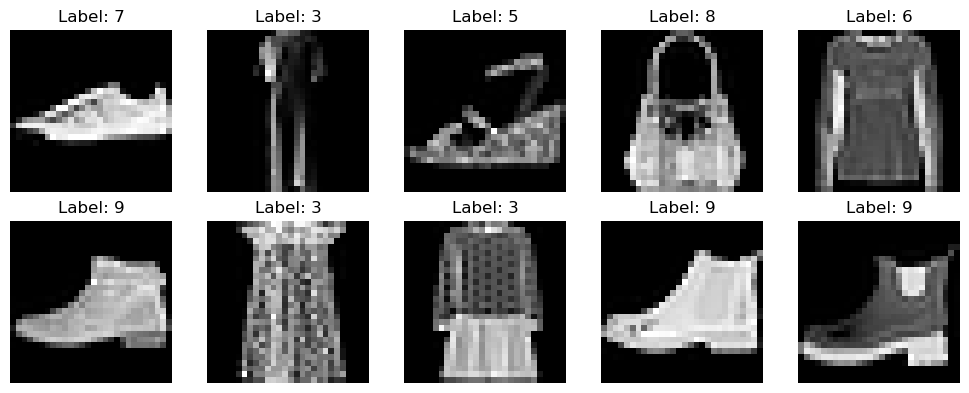

In [6]:
# Step iv: Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {np.argmax(y_train[i])}')
plt.tight_layout()
plt.show()

In [7]:
# Step v: Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Step vi: Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 39s 25ms/step - loss: 0.4116 - accuracy: 0.8540 - val_loss: 0.3070 - val_accuracy: 0.8863
Epoch 2/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2757 - accuracy: 0.9004 - val_loss: 0.2738 - val_accuracy: 0.8999
Epoch 3/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2298 - accuracy: 0.9159 - val_loss: 0.2520 - val_accuracy: 0.9082
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1955 - accuracy: 0.9286 - val_loss: 0.2513 - val_accuracy: 0.9099
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1695 - accuracy: 0.9376 - val_loss: 0.2621 - val_accuracy: 0.9082
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1455 - accuracy: 0.9470 - val_loss: 0.2488 - val_accuracy: 0.9113
Epoch 7/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1232 - accuracy: 0.9552 - val_loss: 0.2640 -

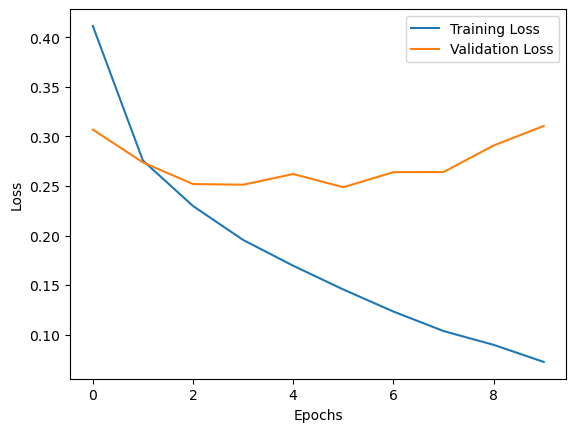

In [9]:
# Step vii: Print the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Step viii: Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print("Accuracy:", accuracy)


313/313 [==============================] - 2s 7ms/step
Accuracy: 0.9099


In [11]:
# Step ix: Test the model for a custom image
custom_image = X_test[0]  # Use the first image from the test set
custom_image = np.expand_dims(custom_image, axis=0)
prediction = model.predict(custom_image)
predicted_label = np.argmax(prediction)
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 63ms/step
Predicted Label: 9
